In [1]:
from collections import Counter
import ipywidgets  as widgets
import itertools
import json
import pandas as pd 
from urllib.request import urlopen

In [2]:
#load data
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/projects.json"
projects = json.loads(urlopen(url).read())

print(f"{len(projects)} projects")
print(json.dumps(projects[4], indent=2))

955 projects
{
  "id": 19,
  "created_on": "2020-03-03 13:54:31",
  "title": "Diffusion to Vector",
  "description": "Reference implementation of Diffusion2Vec (Complenet 2018) built on Gensim and NetworkX. ",
  "tag": "graph-learning"
}


In [3]:
#load data from json to pandas
df = pd.DataFrame(projects)
print(f"{len(df)} projects")
df.head()

955 projects


,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",graph-learning
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...,graph-learning


In [4]:
len(df.tag.notnull()) # -> tag is not value null

955

In [5]:
# most common tags
tags = Counter(df.tag.values)
tags.most_common()

[('natural-language-processing', 388),
 ('computer-vision', 356),
 ('mlops', 79),
 ('reinforcement-learning', 56),
 ('graph-learning', 45),
 ('time-series', 31)]

In [6]:
#load data support for tags
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.json"
tags_dict = {}
for item in json.loads(urlopen(url).read()):
    key = item.pop("tag")
    tags_dict[key] = item

print(f"{len(tags_dict)} tags")

4 tags


In [7]:
@widgets.interact(tag=list(tags_dict.keys()))
def display_tag_details(tag="computer-vision"):
    print(json.dumps(tags_dict[tag], indent=2))

interactive(children=(Dropdown(description='tag', options=('computer-vision', 'graph-learning', 'mlops', 'natu…

In [8]:
display_tag_details("computer-vision")

{
  "aliases": [
    "cv",
    "vision"
  ]
}


#### EDA

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from wordcloud import WordCloud, STOPWORDS

sns.set_theme()
warnings.filterwarnings("ignore")

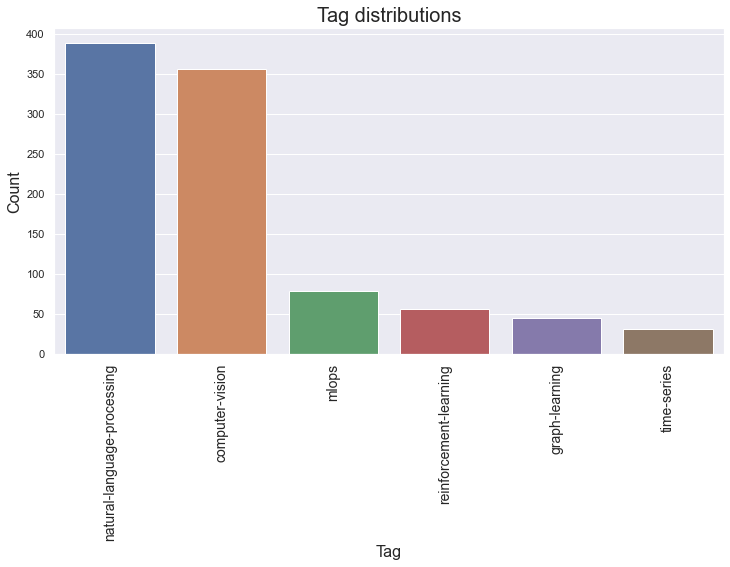

In [10]:
#tag distributions

tags, tags_counts = zip(*Counter(df.tag.values).most_common())
plt.figure(figsize=(12, 6))
ax = sns.barplot(list(tags), list(tags_counts))
plt.title("Tag distributions", fontsize=20)
plt.xlabel("Tag", fontsize=16)
plt.ylabel("Count", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.show()

* Liệu thông qua tiêu đề và mô tả của mỗi bài báo thì có đủ phán ánh nội dung của bài báo đó là gì không

In [11]:
# Most frequent tokens for each tag
@widgets.interact(tag=list(tags))
def display_word_cloud(tag="natural-language-processing"):
    # Plot word clouds top top tags
    plt.figure(figsize=(15, 5))
    subset = df[df.tag==tag]
    text = subset.title.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color="black", collocations=False,
        width=500, height=300).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud);

interactive(children=(Dropdown(description='tag', options=('natural-language-processing', 'computer-vision', '…

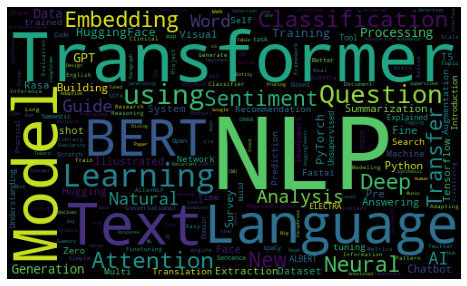

In [12]:
display_word_cloud()

* Có thể kết luận: thông qua tiêu đề cũng như là mô tả của mỗi bài báo thì dưới con mắt chúng ta có thể kết luận bài báo đó thuộc thể loại nào

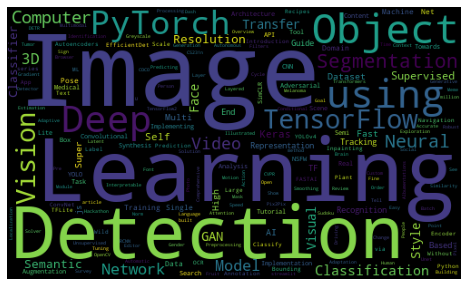

In [13]:
display_word_cloud("computer-vision")

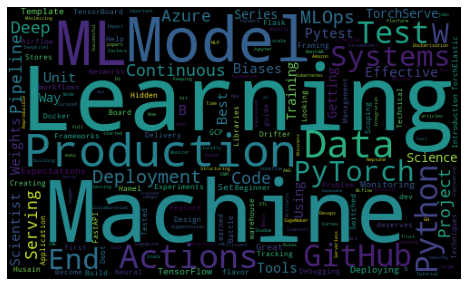

In [14]:
display_word_cloud("mlops")

#### Labeling

In [15]:
#Out of tags
oos_tags = [item for item in df.tag.unique() if item not in tags_dict.keys()]
oos_tags

['reinforcement-learning', 'time-series']

In [16]:
# sample with oos tags
oos_indices = df[df.tag.isin(oos_tags)].index
df[df.tag.isin(oos_tags)].head()

,id,created_on,title,description,tag
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
37,121,2020-03-24 04:56:38,Deep Reinforcement Learning in TensorFlow2,deep-rl-tf2 is a repository that implements a ...,reinforcement-learning
67,218,2020-04-06 11:29:57,Distributional RL using TensorFlow2,🐳 Implementation of various Distributional Rei...,reinforcement-learning
74,239,2020-04-06 18:39:48,Prophet: Forecasting At Scale,Tool for producing high quality forecasts for ...,time-series
95,277,2020-04-07 00:30:33,Curriculum for Reinforcement Learning,Curriculum learning applied to reinforcement l...,reinforcement-learning


In [17]:
#replace this tag with "other"
df.tag = df.tag.apply(lambda x: "other" if x in oos_tags else x)

In [18]:
# out of tags samples should be "other"
df.iloc[oos_indices].head()

,id,created_on,title,description,tag
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
37,121,2020-03-24 04:56:38,Deep Reinforcement Learning in TensorFlow2,deep-rl-tf2 is a repository that implements a ...,other
67,218,2020-04-06 11:29:57,Distributional RL using TensorFlow2,🐳 Implementation of various Distributional Rei...,other
74,239,2020-04-06 18:39:48,Prophet: Forecasting At Scale,Tool for producing high quality forecasts for ...,other
95,277,2020-04-07 00:30:33,Curriculum for Reinforcement Learning,Curriculum learning applied to reinforcement l...,other


In [19]:
# minimum frequency requied for a tag
min_freq = 75
tags = Counter(df.tag.values)


In [20]:
@widgets.interact(min_freq=(0, tags.most_common()[0][1]))
def separate_tags_by_freq(min_freq=min_freq):
    tags_above_freq = Counter(tag for tag in tags.elements() \
                              if tags[tag] >= min_freq)
    tags_below_freq = Counter(tag for tag in tags.elements() \
                              if tags[tag] < min_freq)

    print(f"Most popular tags: \n {tags_above_freq.most_common(3)}")
    print("\n Tags that just made the cut: \n", tags_above_freq.most_common()[-3])
    print("\n Tags that just missed the cut: \n", tags_below_freq.most_common(3))

interactive(children=(IntSlider(value=75, description='min_freq', max=388), Output()), _dom_classes=('widget-i…

In [21]:
separate_tags_by_freq()

Most popular tags: 
 [('natural-language-processing', 388), ('computer-vision', 356), ('other', 87)]

 Tags that just made the cut: 
 ('computer-vision', 356)

 Tags that just missed the cut: 
 [('graph-learning', 45)]


In [22]:
#define if a tag anthoer to be included in the dataset
def filter(tag, include=[]):
    if tag not in include:
        tag = None 
    return tag

In [23]:
# filter tags that have less than 75 occurrences
tags_above_freq = Counter(tag for tag in tags.elements() \
                          if tags[tag] >= min_freq) # apply tag > 75

df.tag = df.tag.apply(filter, include=list(tags_above_freq.keys()))


In [24]:
# fill None with "other"
df.tag = df.tag.fillna("other")

In [25]:
df.tag.value_counts()

natural-language-processing    388
computer-vision                356
other                          132
mlops                           79
Name: tag, dtype: int64

In [26]:
# Save labeled data
with open("labeled_projects.json", "w") as fp:
    json.dump(df.to_dict(orient="records"), indent=2, fp=fp)

#### Preprocessing

In [27]:
#Input
df["text"] = df.title + " " + df.description

In [28]:
# clean text
#!pip install nltk==3.7 -q

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re 

In [30]:
nltk.download('stopwords')
STOPWORDS = stopwords.words("english")
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def clean_text(text, lower=True, stem=False, stopwords=STOPWORDS):
    #lower
    if lower:
        text = text.lower()
    
    #remove stopwords
    if len(stopwords):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s')
        text = pattern.sub('', text)

    #spacing and filters
    text = re.sub(
        r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text #tim khoang cach giua cac doi tuong
    )
    text = re.sub("[^A-Za-z0-9]+", " ", text) #loai bo cac ky tu khong phai chu cai hoac so
    text = re.sub(" +", " ", text) #loai bo nhieu dau cach
    text = text.strip()

    #remove links
    text = re.sub(r"http\S+", "", text)

    #stemming 
    if stem:
        text = " ".join([stemmer.stem(word, to_lowercase=lower) for word in text.split(" ")])

    return text 

In [32]:
#apply clean text to dataframe
original_df = df.copy()
df.text = df.text.apply(clean_text, lower=True, stem=False)
print(f"{original_df.text.values[0]}\n{df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
comparison yolo rcnn real world videos bringing theory experiment cool easily train models colab find results minutes


In [33]:
#Encoding
import numpy as np
import random

In [34]:
X = df.text.to_numpy()
y = df.tag 

In [35]:
X[:2]

array(['comparison yolo rcnn real world videos bringing theory experiment cool easily train models colab find results minutes',
       'show infer tell contextual inference creative captioning beauty work lies way architects fundamental idea humans look overall image individual pieces it'],
      dtype=object)

In [134]:
# build LableEncoder from scikit learn end-to-end
class LabelEncoder(object):
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index or {}
        self.index_to_class = {v:k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_class={len(self)})>"

    def fit(self, y):
        classes = np.unique(y)
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v:k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        encoded = np.zeros(len(y), dtype=int)
        for i, item in enumerate(y):
            encoded[i] = self.class_to_index[item]
        return encoded
    
    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            classes.append(self.index_to_class[item])
        return classes

    def save(self, fp):
        with open(fp, "w") as fp:
            contents = {"class_to_index": self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, "r") as fp:
            kwargs = json.load(fp=f)
        return cls(**kwargs)
    
    

In [37]:
# encode y
label_encoder = LabelEncoder()
label_encoder.fit(y)
num_classes = len(label_encoder)

In [38]:
label_encoder.class_to_index

{'computer-vision': 0,
 'mlops': 1,
 'natural-language-processing': 2,
 'other': 3}

In [39]:
label_encoder.index_to_class

{0: 'computer-vision',
 1: 'mlops',
 2: 'natural-language-processing',
 3: 'other'}

In [40]:
#demo encode
label_encoder.encode(["mlops", "computer-vision", "other", "other"])

array([1, 0, 3, 3])

In [41]:
label_encoder.decode(np.array([0, 1, 2, 2]))

['computer-vision',
 'mlops',
 'natural-language-processing',
 'natural-language-processing']

In [42]:
#encode all label
y = label_encoder.encode(y)
print(y.shape)

(955,)


#### Split data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split size
train_size = 0.7
val_size = 0.15
test_size = 0.15

In [45]:
#split train
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=train_size, stratify=y)
#straty=y to make sure that the distribution of classes is the same in train and test

In [46]:
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 668 (0.70)
remaining: 287 (0.30)


In [47]:
#split test
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)

In [48]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 668 (0.70)
val: 143 (0.15)
test: 144 (0.15)


In [49]:
#get counts for each class
counts = {}
counts["train_counts"] = {tag: label_encoder.decode(y_train).count(tag) for tag in label_encoder.classes}
counts["val_counts"] = {tag: label_encoder.decode(y_val).count(tag) for tag in label_encoder.classes}
counts["test_counts"] = {tag: label_encoder.decode(y_test).count(tag) for tag in label_encoder.classes}

<AxesSubplot:>

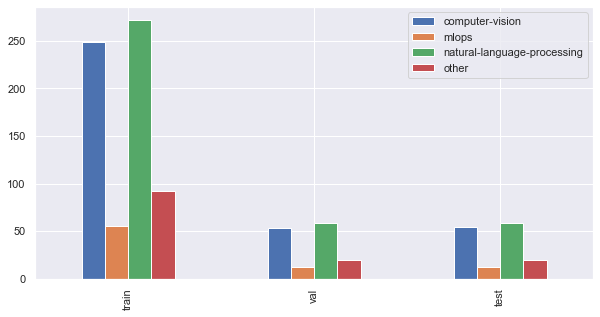

In [50]:
#distributions of classes in train, val, test
pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0).plot(kind="bar", figsize=(10, 5))

In [51]:
pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

,computer-vision,mlops,natural-language-processing,other
train,249,55,272,92
val,53,12,58,20
test,54,12,58,20


In [52]:
#adjust counts across splits
for k in counts["val_counts"].keys():
    counts["val_counts"][k] = int(counts["val_counts"][k] * (train_size/val_size))

for k in counts["test_counts"].keys():
    counts["test_counts"][k] = int(counts["test_counts"][k] * (train_size/test_size))

In [53]:
dist_df = pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)
dist_df

,computer-vision,mlops,natural-language-processing,other
train,249,55,272,92
val,247,56,270,93
test,252,56,270,93


In [54]:
#std 
np.mean(np.std(dist_df.to_numpy(), axis=0))

0.9851056877051131

In [55]:
# split datagframe
train_df = pd.DataFrame({"text": X_train, "tag": label_encoder.decode(y_train)})
val_df = pd.DataFrame({"text": X_val, "tag": label_encoder.decode(y_val)})
test_df = pd.DataFrame({"text": X_test, "tag": label_encoder.decode(y_test)})

In [56]:
train_df.head()

,text,tag
0,cnn see first super clean notebook showcasing ...,computer-vision
1,bridging pytorch tvm taking hugging face trans...,natural-language-processing
2,divide hugging face transformers training time...,natural-language-processing
3,multi task nlp utility toolkit enabling nlp de...,natural-language-processing
4,clodsa tool augmentation computer vision tasks...,computer-vision


#### Augment data text

In [57]:
import nlpaug.augmenter.word as naw

In [58]:
#replace dashes from tags and aliases
def replace_dash(x):
    return x.replace("-", " ")

In [59]:
#create dict of aliases
flat_tags_dict = {}
for tag, info in tags_dict.items():
    tag = replace_dash(x=tag)
    aliases = list(map(replace_dash, info["aliases"]))
    if len(aliases):
        flat_tags_dict[tag] = aliases
    for alias in aliases:
        _aliases = aliases + [tag]
        _aliases.remove(alias)
        flat_tags_dict[alias] = _aliases

In [60]:
print(flat_tags_dict["natural language processing"])
print(flat_tags_dict["mlops"])

['nlp', 'nlproc']
['production']


In [61]:
print("gan" in "this is a gan.")
print("gan" in "this is gandalf")

True
True


In [62]:
# \b mathces spaces
def find_word(word, text):
    word = word.replace("+", "\+")
    pattern = re.compile(fr"\b({word})\b", flags=re.IGNORECASE)
    return pattern.search(text)

In [63]:
#tesst
print(find_word("gan", "this is a gan."))
print(find_word("gan", "this is gandalf"))

<re.Match object; span=(10, 13), match='gan'>
None


In [64]:
from snorkel.augmentation import transformation_function

In [65]:
@transformation_function()
def swap_aliases(x):
    #find all matches

    matches = []
    for i, tag in enumerate(flat_tags_dict):
        match = find_word(tag, x.text)
        if match:
            matches.append(match)
    
    #swap a random match with a random alias
    if len(matches):
        match = random.choice(matches)
        tag = x.text[match.start() : match.end()]
        x.text = f"{x.text[:match.start()]} {random.choice(flat_tags_dict[tag])} {x.text[match.end():]}"
    
    return x

In [66]:
#swap 
for i in range(3):
    sample_df = pd.DataFrame([{"text": "a survey of reinforcement learning algorithms for nlp tasks."}])
    sample_df.text = sample_df.text.apply(clean_text, lower=True, stem=False)
    print(swap_aliases(sample_df.iloc[0]).text)

survey reinforcement learning algorithms  nlproc  tasks
survey reinforcement learning algorithms  nlproc  tasks
survey reinforcement learning algorithms  natural language processing  tasks


In [67]:
from snorkel.augmentation import ApplyOnePolicy, PandasTFApplier


#### Baselines

In [68]:
import random

def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)

In [69]:
def preprocess(df, lower, stem):
    df["text"] = df.title + " " + df.description
    df.text = df.text.apply(clean_text, lower=lower, stem=stem)
    return df

In [70]:
def get_data_splits(X, y, train_size=0.7):
    X_train, X_, y_train, y_ = train_test_split(
        X, y, train_size=train_size, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_, y_, train_size=0.5, stratify=y_
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

##### Random

In [71]:
from sklearn.metrics import precision_recall_fscore_support

In [72]:
#setup
set_seeds()
df = pd.DataFrame(json.load(open('labeled_projects.json')))
df = df.sample(frac=1).reset_index(drop=True)
df = preprocess(df, lower=True, stem=True)
label_encoder = LabelEncoder().fit(df.tag)
X_train, X_val, X_test, y_train, y_val, y_test = get_data_splits(
    X=df.text.to_numpy(), y=label_encoder.encode(df.tag)
)

In [73]:
print(label_encoder)
print(label_encoder.classes)

<LabelEncoder(num_class=4)>
['computer-vision', 'mlops', 'natural-language-processing', 'other']


In [74]:
#generate random predictions
y_pred = np.random.randint(low=0, high=len(label_encoder), size=len(y_test))
print(y_pred.shape)
print(y_pred[:5])

(144,)
[2 2 1 3 3]


In [75]:
#evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print(json.dumps(performance, indent=2))

{
  "precision": 0.2844744487889649,
  "recall": 0.22916666666666666,
  "f1": 0.24552884283001275
}


In [76]:
#class frequencies(tim xac xuat cho moi lop)
p = [Counter(y_test)[index]/len(y_test) for index in range(len(label_encoder))]
p

[0.375, 0.08333333333333333, 0.4027777777777778, 0.1388888888888889]

In [77]:
y_pred = np.random.choice(a=range(len(label_encoder)), size=len(y_test), p=p)


In [78]:
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print(json.dumps(performance, indent=2))

{
  "precision": 0.3294211281499417,
  "recall": 0.3194444444444444,
  "f1": 0.3239553132352485
}


##### Rule-based

In [79]:
print(len(tags_dict))
tags_dict = {tag: tags_dict[tag] for tag in label_encoder.classes if tag != "other"}
print(len(tags_dict))

4
3


In [80]:
#map aliases
aliases = {}
for tag, values in tags_dict.items():
    aliases[clean_text(tag)] = tag 
    for alias in values["aliases"]:
        aliases[clean_text(alias)] = tag

aliases

{'computer vision': 'computer-vision',
 'cv': 'computer-vision',
 'vision': 'computer-vision',
 'mlops': 'mlops',
 'production': 'mlops',
 'natural language processing': 'natural-language-processing',
 'nlp': 'natural-language-processing',
 'nlproc': 'natural-language-processing'}

In [81]:
def get_tag(text, aliases, tags_dict):
    for alias, tag in aliases.items():
        if alias in text:
            return tag
    return None

In [82]:
#sample
text = "A pretrained model hub for nlp tasks and algorithms."
get_tag(text=clean_text(text), aliases=aliases, tags_dict=tags_dict)

'natural-language-processing'

In [83]:
#prediction
tags = []
for text in X_test:
    tag = get_tag(text, aliases, tags_dict)
    tags.append(tag)

In [84]:
#encode labels
y_pred = [label_encoder.class_to_index[tag] if tag is not None else -1 for tag in tags]

In [85]:
#evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print(json.dumps(performance, indent=2))

{
  "precision": 0.7777777777777778,
  "recall": 0.125,
  "f1": 0.21105540967083103
}


In [86]:
text = "Transfer learning with transformers for text classification."
print (get_tag(text=clean_text(text), aliases=aliases, tags_dict=tags_dict))

None


##### Vectorized

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
# Setup
set_seeds()
df = pd.DataFrame(json.load(open("labeled_projects.json", "r")))
df = df.sample(frac=1).reset_index(drop=True)
df = preprocess(df, lower=True, stem=False)
label_encoder = LabelEncoder().fit(df.tag)
X_train, X_val, X_test, y_train, y_val, y_test = \
    get_data_splits(X=df.text.to_numpy(), y=label_encoder.encode(df.tag))

In [89]:
X_test_raw = X_test

In [90]:
#tf-idf
vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2, 7))
#print(X_train[0])
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)
print(X_train.shape)

(668, 99421)


In [91]:
#class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print(f"class counts: {counts}, \nclass weights: {class_weights}")

class counts: [249  55 272  92], 
class weights: {0: 0.004016064257028112, 1: 0.01818181818181818, 2: 0.003676470588235294, 3: 0.010869565217391304}


##### Machine leanring

In [92]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, precision_recall_fscore_support

In [93]:
#initialize model
model = SGDClassifier(
    loss="log", penalty="l2", alpha=1e-4, max_iter=1,
    learning_rate="constant", eta0=1e-1, power_t=0.1,
    warm_start=True
)

In [94]:
#train model
num_epochs = 1000
for epoch in range(num_epochs):
    #training
    model.fit(X_train, y_train)

    #evaluate
    train_loss = log_loss(y_train, model.predict_proba(X_train))
    val_loss = log_loss(y_val, model.predict_proba(X_val))

    if not epoch % 10:
        print(
            f"Epoch: {epoch:02d} | "
            f"Train_loss: {train_loss:.5f}, "
            f"Val_loss: {val_loss:.5f}"
        )

Epoch: 00 | Train_loss: 1.18340, Val_loss: 1.20200
Epoch: 10 | Train_loss: 0.54065, Val_loss: 0.68014
Epoch: 20 | Train_loss: 0.37342, Val_loss: 0.56122
Epoch: 30 | Train_loss: 0.29287, Val_loss: 0.50777
Epoch: 40 | Train_loss: 0.24561, Val_loss: 0.47716
Epoch: 50 | Train_loss: 0.21524, Val_loss: 0.45764
Epoch: 60 | Train_loss: 0.19454, Val_loss: 0.44464
Epoch: 70 | Train_loss: 0.17986, Val_loss: 0.43540
Epoch: 80 | Train_loss: 0.16908, Val_loss: 0.42863
Epoch: 90 | Train_loss: 0.16062, Val_loss: 0.42330
Epoch: 100 | Train_loss: 0.15437, Val_loss: 0.41943
Epoch: 110 | Train_loss: 0.14950, Val_loss: 0.41642
Epoch: 120 | Train_loss: 0.14565, Val_loss: 0.41416
Epoch: 130 | Train_loss: 0.14247, Val_loss: 0.41218
Epoch: 140 | Train_loss: 0.13993, Val_loss: 0.41072
Epoch: 150 | Train_loss: 0.13779, Val_loss: 0.40940
Epoch: 160 | Train_loss: 0.13616, Val_loss: 0.40850
Epoch: 170 | Train_loss: 0.13473, Val_loss: 0.40763
Epoch: 180 | Train_loss: 0.13363, Val_loss: 0.40703
Epoch: 190 | Train_los

In [95]:
# Evaluate
y_pred = model.predict(X_test)
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.8714324618736384,
  "recall": 0.8680555555555556,
  "f1": 0.8666687267493719
}


##### Inference

In [96]:
# predict same data
text = "Transfer learning with transformers for text classification."
y_pred = model.predict(vectorizer.transform([text]))
label_encoder.decode(y_pred)

['natural-language-processing']

In [97]:
#probabilities
y_prob = model.predict_proba(vectorizer.transform([text]))
{tag: y_prob[0][i] for i, tag in enumerate(label_encoder.classes)}

{'computer-vision': 0.01908637248403625,
 'mlops': 0.002684094153979367,
 'natural-language-processing': 0.9704020196802875,
 'other': 0.007827513681696952}

In [98]:
#inference on unseen data
text = "Multi-scale Multi-band DenseNets for Audio Source Separation"
y_pred = model.predict(vectorizer.transform([text]))
label_encoder.decode(y_pred)

['computer-vision']

In [99]:
y_prob = model.predict_proba(vectorizer.transform([text]))
{tag: y_prob[0][i] for i, tag in enumerate(label_encoder.classes)}

{'computer-vision': 0.6016736711720817,
 'mlops': 0.061651227927916594,
 'natural-language-processing': 0.2798585247007047,
 'other': 0.05681657619929696}

In [100]:
# xác định một ngưỡng xác suất nào đó để chọn các lớp
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)
threshold = np.quantile([y_prob[i][j] for i, j in enumerate(y_pred)], q=0.25)
threshold

0.6962505093761624

In [101]:
#custom predict funciton
def custom_predict(y_prob, threshold, index):
    y_pred = [np.argmax(p) if max(p) > threshold else index for p in y_prob]
    return np.array(y_pred)

In [102]:
def predict_tag(texts):
    y_prob = model.predict_proba(vectorizer.transform(texts))
    other_index = label_encoder.class_to_index["other"]
    y_pred = custom_predict(y_prob, threshold, other_index)
    return label_encoder.decode(y_pred)

In [103]:
text = "Deep Residual Learning for Image Recognition"
predict_tag(texts=[text])

['computer-vision']

#### Evaluate

In [104]:
metrics = {"overall": {}, "class": {}}

In [105]:
#data to evaluate
other_index = label_encoder.class_to_index["other"]
y_prob = model.predict_proba(X_test)
y_pred = custom_predict(y_prob, threshold, other_index)

##### Coarse-grained

In [106]:
# overall metrics
overall_metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
metrics["overall"]["precision"] = overall_metrics[0]
metrics["overall"]["recall"] = overall_metrics[1]
metrics["overall"]["f1"] = overall_metrics[2]
metrics["overall"]["num_samples"] = np.float64(len(y_test))
print(json.dumps(metrics["overall"], indent=4))

{
    "precision": 0.9075217864923748,
    "recall": 0.7777777777777778,
    "f1": 0.8051343092124329,
    "num_samples": 144.0
}


##### Fine-grained

In [107]:
from collections import OrderedDict

In [108]:
#per-class metrics
class_metrics = precision_recall_fscore_support(y_test, y_pred, average=None)
for i, _class in enumerate(label_encoder.classes):
    metrics["class"][_class] = {
        "precision": class_metrics[0][i],
        "recall": class_metrics[1][i],
        "f1": class_metrics[2][i],
        "num_samples": np.float64(class_metrics[3][i])
    }

In [109]:
#metrics for a specific class
tag = "mlops"
print(json.dumps(metrics["class"][tag], indent=4))

{
    "precision": 1.0,
    "recall": 0.5833333333333334,
    "f1": 0.7368421052631579,
    "num_samples": 12.0
}


In [110]:
#sort tags
sorted_tags_by_f1 = OrderedDict(
    sorted(metrics["class"].items(), key=lambda x: x[1]["f1"], reverse=True)
)

for item in sorted_tags_by_f1.items():
    print(json.dumps(item, indent=2))

[
  "natural-language-processing",
  {
    "precision": 0.98,
    "recall": 0.8448275862068966,
    "f1": 0.9074074074074074,
    "num_samples": 58.0
  }
]
[
  "computer-vision",
  {
    "precision": 1.0,
    "recall": 0.6666666666666666,
    "f1": 0.8,
    "num_samples": 54.0
  }
]
[
  "mlops",
  {
    "precision": 1.0,
    "recall": 0.5833333333333334,
    "f1": 0.7368421052631579,
    "num_samples": 12.0
  }
]
[
  "other",
  {
    "precision": 0.39215686274509803,
    "recall": 1.0,
    "f1": 0.5633802816901409,
    "num_samples": 20.0
  }
]


##### Confusion-Matrix

In [111]:
# TP, FP, FN samples
tag = "mlops"
index = label_encoder.class_to_index[tag]
tp, fp, fn = [], [], []
for i, true in enumerate(y_test):
    pred = y_pred[i]
    if index == true == pred:
        tp.append(i)
    elif index != true and index == pred:
        fp.append(i)
    elif index == true and index != pred:
        fn.append(i)

In [112]:
print(tp)
print(fp)
print(fn)

[5, 47, 52, 96, 111, 123, 129]
[]
[0, 38, 130, 136, 141]


In [113]:

index = tp[0]
print (X_test_raw[index])
print (f"true: {label_encoder.decode([y_test[index]])[0]}")
print (f"pred: {label_encoder.decode([y_pred[index]])[0]}")

test machine learning code systems minimal examples testing machine learning correct implementation expected learned behaviour model performance
true: mlops
pred: mlops


In [114]:
# Samples
num_samples = 3
cm = [(tp, "True positives"), (fp, "False positives"), (fn, "False negatives")]
for item in cm:
    if len(item[0]):
        print (f"\n=== {item[1]} ===")
        for index in item[0][:num_samples]:
            print (f"  {X_test_raw[index]}")
            print (f"    true: {label_encoder.decode([y_test[index]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[index]])[0]}\n")



=== True positives ===
  test machine learning code systems minimal examples testing machine learning correct implementation expected learned behaviour model performance
    true: mlops
    pred: mlops

  continuous machine learning cml cml helps organize mlops infrastructure top traditional software engineering stack instead creating separate ai platforms
    true: mlops
    pred: mlops

  machine learning systems design designing machine learning system
    true: mlops
    pred: mlops


=== False negatives ===
  pytest pytest framework makes easy write small tests yet scales support complex functional testing
    true: mlops
    pred: other

  hidden technical debt machine learning systems using software engineering framework technical debt find common incur massive ongoing maintenance costs real world ml systems
    true: mlops
    pred: other

  docker help become effective data scientist look docker perspective data scientist
    true: mlops
    pred: other



* Thực sự là một ý tưởng hay khi thực hiện loại phân tích này bằng cách sử dụng phương pháp dựa trên quy tắc của chúng tôi để phát hiện các lỗi ghi nhãn thực sự rõ ràng

##### Confident learning

In [115]:
y_prob = model.predict_proba(X_test)
print(np.shape(y_test))
print(np.shape(y_prob))

(144,)
(144, 4)


In [116]:
# show raw text
test_df = pd.DataFrame({"text": X_test_raw, "tag": label_encoder.decode(y_test)})

In [117]:
# tag to inspect
tag = "mlops"
index = label_encoder.class_to_index[tag]
indices = np.where(y_test==index)[0]

In [118]:
# Confidence score for the correct class is below a threshold
low_confidence = []
min_threshold = 0.5
for i in indices:
    prob = y_prob[i][index]
    if prob <= 0.5:
        low_confidence.append({"text": test_df.text[i],
                               "true": label_encoder.index_to_class[y_test[i]],
                               "pred": label_encoder.index_to_class[y_pred[i]],
                               "prob": prob})

In [119]:
low_confidence[:5]

[{'text': 'hidden technical debt machine learning systems using software engineering framework technical debt find common incur massive ongoing maintenance costs real world ml systems',
  'true': 'mlops',
  'pred': 'other',
  'prob': 0.35881489924061866},
 {'text': 'docker help become effective data scientist look docker perspective data scientist',
  'true': 'mlops',
  'pred': 'other',
  'prob': 0.3338074247000939},
 {'text': 'neptune ai lightweight experiment management tool fits workflow',
  'true': 'mlops',
  'pred': 'other',
  'prob': 0.21411160613944383}]

#### Behavior Testing

* bên cạnh việc đánh giá các tham số, ta có thể kết hợp một số loại testing

##### Evaluating evaluations

#### Experiment tracking

In [120]:
from argparse import Namespace
import mlflow
from pathlib import Path 

In [121]:
# specify arguments
args = Namespace(
    lower=True,
    stem=False,
    analyzer="char",
    ngram_max_range=7,
    alpha=1e-4,
    learning_rate=1e-1,
    power_t=0.1,
    num_epochs=100
)

In [130]:
# set tracking URI
MODEL_REGISTRY = Path("experiments")
Path(MODEL_REGISTRY).mkdir(exist_ok=True)
mlflow.set_tracking_uri("file:///" + str(MODEL_REGISTRY.absolute()))

In [123]:
def train(args, df, trial=None):
    #setup
    set_seeds()
    df = pd.DataFrame(json.load(open("labeled_projects.json", "r")))
    df = df.sample(frac=1).reset_index(drop=True)
    df = preprocess(df, lower=True, stem=True)
    label_encoder = LabelEncoder().fit(df.tag)
    X_train, X_val, X_test, y_train, y_val, y_test = get_data_splits(
        X=df.text.to_numpy(),
        y=label_encoder.encode(df.tag)
    )

    #tf-idf
    vectorizer = TfidfVectorizer(analyzer=args.analyzer, ngram_range=(2, args.ngram_max_range))
    X_train = vectorizer.fit_transform(X_train)
    X_val = vectorizer.transform(X_val)
    X_test = vectorizer.transform(X_test)

    #model
    model = SGDClassifier(
        loss="log", penalty="l2", alpha=args.alpha,
        max_iter=1, learning_rate="constant", eta0=args.learning_rate,
        power_t=args.power_t, warm_start=True
    )

    #training
    for epoch in range(args.num_epochs):
        model.fit(X_train, y_train)
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        val_loss = log_loss(y_val, model.predict_proba(X_val))
        if not epoch%10:
            print(
                f"Epoch: {epoch:02d} |",
                f"Train loss: {train_loss:.4f} |",
                f"Validation loss: {val_loss:.4f}"
            )
        
        #log
        if not trial:
            mlflow.log_metrics({"train_loss": train_loss, "val_loss": val_loss}, step=epoch)
        
        #pruning

    #threshold
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)
    args.threshold = np.quantile(
        [y_prob[i][j] for i, j in enumerate(y_pred)], q=0.25
    )

    #evaluate
    other_index = label_encoder.class_to_index["other"]
    y_prob = model.predict_proba(X_test)
    y_pred = custom_predict(y_prob, args.threshold, other_index)
    metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    performance = {"percision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
    print(json.dumps(performance, indent=2))

    return {
        "args": args,
        "label_encoder": label_encoder,
        "vectorizer": vectorizer,
        "model": model,
        "performance": performance
    }


##### Tracking

In [124]:
import  joblib
import tempfile

In [131]:
#set experiment
mlflow.set_experiment(experiment_name="baselines")

2022/08/03 10:19:52 INFO mlflow.tracking.fluent: Experiment with name 'baselines' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///d:\\MLOps-Project\\notebooks\\experiments/0', experiment_id='0', lifecycle_stage='active', name='baselines', tags={}>

In [127]:
def save_dict(d, filepath):
    with open(filepath, "w") as f:
        json.dump(d, indent=2, sort_keys=False, fp=f)

In [135]:
#tracking
with mlflow.start_run(run_name="sgd"):
    #Train & evaluate
    artifacts = train(args=args, df=df)

    #log key metrics
    mlflow.log_metrics({"percision": artifacts["performance"]["percision"]})
    mlflow.log_metrics({"recall": artifacts["performance"]["recall"]})
    mlflow.log_metrics({"f1": artifacts["performance"]["f1"]})

    #log artifacts
    with tempfile.TemporaryDirectory() as dp:
        artifacts["label_encoder"].save(Path(dp, "label_encoder.json"))
        joblib.dump(artifacts["vectorizer"], Path(dp, "vectorizer.pkl"))
        joblib.dump(artifacts["model"], Path(dp, "model.pkl"))
        save_dict(artifacts["performance"], Path(dp, "performance.json"))
        mlflow.log_artifact(dp)

    #log parameters
    mlflow.log_params(vars(artifacts["args"]))


Epoch: 00 | Train loss: 1.1934 | Validation loss: 1.2114
Epoch: 10 | Train loss: 0.5453 | Validation loss: 0.6835
Epoch: 20 | Train loss: 0.3754 | Validation loss: 0.5611
Epoch: 30 | Train loss: 0.2941 | Validation loss: 0.5061
Epoch: 40 | Train loss: 0.2465 | Validation loss: 0.4747
Epoch: 50 | Train loss: 0.2160 | Validation loss: 0.4547
Epoch: 60 | Train loss: 0.1952 | Validation loss: 0.4414
Epoch: 70 | Train loss: 0.1804 | Validation loss: 0.4319
Epoch: 80 | Train loss: 0.1696 | Validation loss: 0.4250
Epoch: 90 | Train loss: 0.1611 | Validation loss: 0.4196
{
  "percision": 0.9097448979591837,
  "recall": 0.7916666666666666,
  "f1": 0.8160705215890661
}


In [138]:
!mlflow server -h 0.0.0.0 -p 8000 --backend-store-uri $PWD/experiments/

^C


In [139]:
!mlflow ui

^C
